In [1]:
import numpy as np

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [456]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [457]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [2]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

##  Answer Question 1:

In [3]:
import sympy as sm 
sm.init_printing(use_unicode=True) #for nice printing 

#First, define all the symbols of the model:

alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')
r= sm.symbols('r')
vt= sm.symbols('v_t')
yt= sm.symbols('y_t')
pi= sm.symbols('pi')
phi= sm.symbols('phi')
st= sm.symbols('s_t')
pit_1= sm.symbols('pi_t-1')
yt_1=sm.symbols('y_t-1')
st_1=sm.symbols('s_t-1')


In [4]:
#Define Equations:

#y=-alpha*r+v
AD= (1/(h*alpha))*(vt-(yt*(1+b*alpha)))
SRAS=pit_1+(gamma*yt)-(phi*gamma*yt_1)+st+(phi*st_1)



In [5]:
AD #check that it worked 

In [6]:
SRAS #check that it worked

We can also insert for the given parameter-values, making the AD-and SRSA-curves:

In [7]:
AD1=(1/(par['h']*par['alpha']))*(vt-(yt*(1+par['b']*par['alpha'])))
AD1

In [8]:
SRAS1=pit_1+(par['gamma']*yt)-(par['phi']*par['gamma']*yt_1)+st+(par['phi']*st_1)
SRAS1

The short term equilibrium is defined by aggregate supply (SRAS) equal to aggregate demand (AD). Therefore, we start by setting the two equations equal to each other, and solve for $y_t$ to find the equilibrium output. We will first find the generall equilibrium expressions, and then insert for the given parameter values: 


**Equilibrium output and inflation (general)**

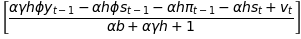

In [9]:
AD_SRAS=sm.Eq(AD,SRAS)
ytstar=sm.solve(AD_SRAS, yt)
ytstar

We now want to solve for the equilibrium inflation, by inserting the obtained ystar into the AD-equation 

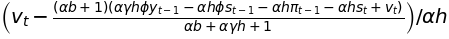

In [10]:
pitstar = 1/(h*alpha)*(vt-(1+b*alpha)*ytstar[0])
pitstar



**Equilibrium output and inflation (with the given parameter values)**

In [11]:
AD1_SRAS1=sm.Eq(AD1,SRAS1)
ytstar1=sm.solve(AD1_SRAS1, yt)
ytstar1

In [12]:
pitstar1 = 1/(par['h']*par['alpha'])*(vt-(1+par['b']*par['alpha'])*ytstar1[0])
pitstar1


We can see that the equilibrium output and inflation depends on inflation in the previous periods and supply- and demand disturbance. 

# Answer question 2

We now want to solve for $y_t$ and $pi_t$ **numerically**.
First, we define the functions 

In [13]:
yt_eq = sm.lambdify((alpha,h,b,phi,gamma,vt,st,pit_1,yt_1,st_1), ytstar[0])

In [14]:
pit_eq = sm.lambdify((alpha,h,b,phi,gamma,vt,st,pit_1,yt_1,st_1), pitstar)

Then use that: 
    
$$y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$$
$$ \alpha = 5.76 $$
$$ h = 0.5 $$
$$ b = 0.5 $$
$$ \phi = 0 $$
$$ \gamma = 0.075$$


In [15]:
yt_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0, 0, 0, 0, 0)

In [16]:
pit_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0, 0, 0, 0, 0)

Now we want to illustrate the solution **graphically**. 

In [17]:
def ADcurve(h, alpha, yt, vt, b):
    return (1/(h*alpha))*(vt-(y*(1+b*alpha)))

def SRAScurve(pit_1, gamma, yt, yt_1, st, phi, st_1):
    return pit_1+(gamma*yt)-(phi*gamma*yt_1)+st+(phi*st_1)

In [18]:
import matplotlib.pyplot as plt

#insert the given values in the funcitons 
y=np.linspace(-0.1,0.1,100)
AD_plot=ADcurve(0.5, 5.76, y, 0, 0.5)
SRAS_plot=SRAScurve(0, 0.075, y, 0, 0, 0, 0)

#create the plot
plt.plot(y,AD_plot,label='AD')
plt.plot(y,SRAS_plot,label='SRAS')
plt.grid(True)

plt.title('AD and SRAS')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')



Text(0, 0.5, '$\\pi_t$')

Graphically, the short term equilibrium is given by the intersection of the AD-curve and the SRAS-curve. 
As seen in the figure, this gives $y_{t} = \pi_{t} $ =0, which corresponds to our numerical solution. 

Now, we do the same with $v_t$ =0.1

#### Numerically 


In [23]:
yt_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0.1, 0, 0, 0, 0)

In [24]:
pit_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0.1, 0, 0, 0, 0)

**Graphically**

Increasning $v_t$ causes a positive shift in the AD-curve:

Text(0, 0.5, '$\\pi_t$')

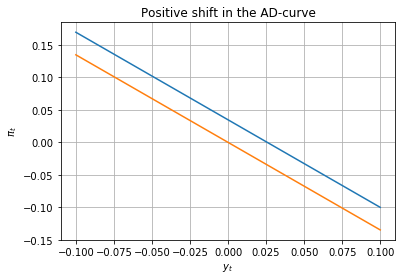

In [25]:
AD_plot1=ADcurve(0.5, 5.76, y, 0.1, 0.5)

y = np.linspace(-0.1,0.1,100)
plt.plot(y,AD_plot1,label='AD1')
plt.plot(y,AD_plot,label='AD0')
plt.grid(True)

plt.title('Positive shift in the AD-curve')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')



For a given value of $y_t$, $\pi_t$ is now higher than before the shift. Therefore, in the new equilibrium $y_t$ and $\pi_t $ will we higher: 

Text(0, 0.5, '$\\pi_t$')

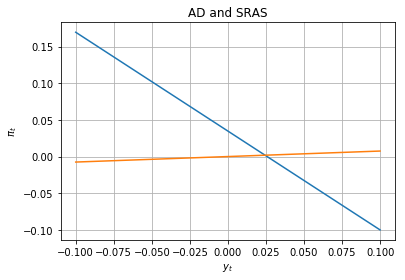

In [26]:
AD_plot1=ADcurve(0.5, 5.76, y, 0.1, 0.5)

y = np.linspace(-0.1,0.1,100)
plt.plot(y,AD_plot1,label='AD0')
plt.plot(y,SRAS_plot,label='SRAS')
plt.grid(True)

plt.title('AD and SRAS')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')

We can see that the graphical solution corresponds to the numerical, with
$y_t$ = 0.0244 and $\pi_t$ = 0.0018


**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [27]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

## Answer question 3

In [28]:
#Define the AR(1) processes
def v_func(vt_1, x):
    return par['delta']*vt_1+x

def s_func(st_1,c):
    return par['omega']*st_1+c


#def ADcurve(h, alpha, yt, vt, b):
 #   return (1/(h*alpha))*(vt-(y*(1+b*alpha)))

#def SRAScurve(pit_1, gamma, yt, yt_1, s, phi, st_1):
 #   return pit_1+(gamma*yt)-(phi*gamma*yt_1)+s+(phi*st_1)

In [29]:
#Run simulation 50 times
T=50

#allocate simulation data 
y = [0]
pi = [0]
v = [0]
s = [0]
c = np.zeros(T)
x = np.zeros(T)
x[1] = 0.1 #demand shock 

for t in range(1,T):
    #update z and v
    v.append(v_func(v[t-1], x[t]))
    s.append(s_func(s[t-1], c[t]))
    
    #compute y and pi using yt_eq and pit_eq 
    y.append(yt_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v[t],s[t],pi[t-1],y[t-1],s[t-1]))
    pi.append(pit_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v[t],s[t],pi[t-1],y[t-1],s[t-1]))


### Plot evolution of output gap over T=50 periods 

Text(0, 0.5, '$y$')

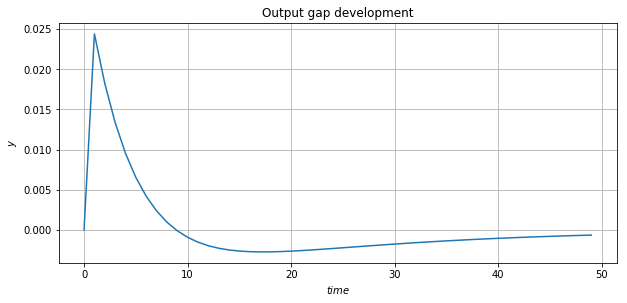

In [30]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)
plt.grid(True)

ax.plot(y,label='$\y$')
ax.set_title('Output gap development')
ax.set_xlabel('$time$')
ax.set_ylabel('$y$')

The spike in the output gap in periode 0 comes from $x_0$ = 0.1. This is equivalent to a demand shock, which causes output to increase. The output gap stabalizes over time, due to the fact that $x_t$ =0. 

### Plot evolution of inflation gap over T=50 periods 

Text(0, 0.5, '$\\pi$')

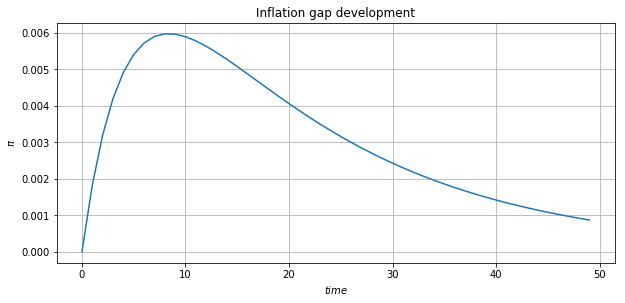

In [31]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)
plt.grid(True)

ax.plot(pi,label='$\pi$')
ax.set_title('Inflation gap development')
ax.set_xlabel('$time$')
ax.set_ylabel('$\pi$')

The interpretation is simlar to the previous. The spike in the inflation gap is caused by the demand shock, $x_0$ =0.1
We can also plot them in the same diagram:

Text(0, 0.5, '$\\pi/y$')

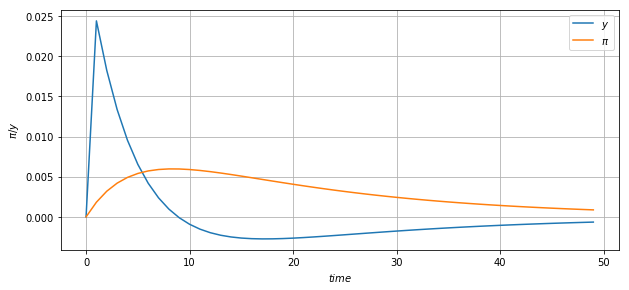

In [32]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)

ax.plot(y,label='$y$')
ax.plot(pi,label='$\pi$')
ax.legend(loc='upper right');
plt.grid(True)


ax.set_xlabel('$time$')
ax.set_ylabel('$\pi/y$')

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [33]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

# Answer question 4
### SImulate model 

In [34]:
#set-up
np.random.seed(12345)   
T=1000

#generate the stochastic shocks 
x1 = np.random.normal(loc=0,scale=par['sigma_x'],size=T)
c1 = np.random.normal(loc=0,scale=par['sigma_c'],size=T)


#allocate simulation data 
y1 = [0]
pi1 = [0]
v1 = [0]
s1 = [0]
x[1] = 0.1 #demand shock 

for t in range(1,T):
    #update z and v
    v1.append(v_func(v1[t-1], x1[t]))
    s1.append(s_func(s1[t-1], c1[t]))
    
    #compute y and pi using yt_eq and pit_eq 
    y1.append(yt_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v1[t],s1[t],pi1[t-1],y1[t-1],s1[t-1]))
    pi1.append(pit_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v1[t],s1[t],pi1[t-1],y1[t-1],s1[t-1]))


## Plot output gap and inflation development in the same graph

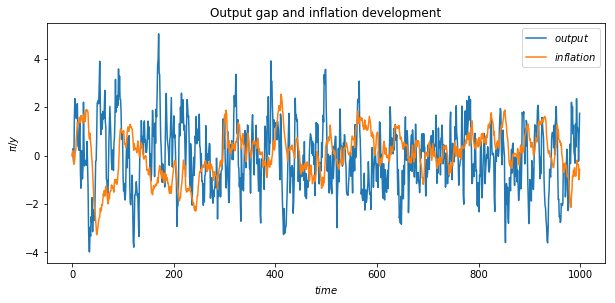

In [35]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)

ax.plot(y1,label='$output$')
ax.plot(pi1,label='$inflation$')

ax.set_title('Output gap and inflation development')
ax.set_xlabel('$time$')
ax.set_ylabel('$\pi/y$')
ax.legend(loc='upper right');

## Calculate statistics 

1.Variance of $y_t$, $var(y_t)$**

In [36]:
y_var=np.var(y1)
y_var

2.Variance of $\pi_t$, $var(\pi_t)$ 

In [37]:
pi_var=np.var(pi1)
pi_var

3.Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$

In [38]:
np.corrcoef(y1,pi1)

array([[ 1.        , -0.17556771],
       [-0.17556771,  1.        ]])

4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$.

In [39]:
#Define a function for autocorrelation 
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

#find the autocorrelation of yt and yt-1
autocorr(y1)

array([[1.        , 0.78020678],
       [0.78020678, 1.        ]])

5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [40]:
autocorr(pi1)

array([[1.       , 0.9720786],
       [0.9720786, 1.       ]])

**Print statistics**

In [41]:
print(f'Variance of y is, {y_var:.2}')
print(f'Variance of pi is, {pi_var:.2}')
print(f'Correlation between y and pi is, {np.corrcoef(y1,pi1)[0,1]:.2}')
print(f'Autocorrelation in pi is, {autocorr(y1)[0,1]:.2}')
print(f'Autocorrelation in y is, {autocorr(pi1)[0,1]:.2}')

Variance of y is, 1.9
Variance of pi is, 0.86
Correlation between y and pi is, -0.18
Autocorrelation in pi is, 0.78
Autocorrelation in y is, 0.97


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Note**: this solution is inspired by chh jmk

In [42]:
#set up
np.random.seed(12345)
T=1000

y5 = [0]
pi5 = [0]
s5=[0]
v5=[0]

x5 = np.random.normal(loc=0,scale=par['sigma_x'],size=T)
c5 = np.random.normal(loc=0,scale=par['sigma_c'],size=T)

#define a function to find the correlation between phi and y - the function take phi as input
def corr(phi):
    pi_star_5=[]
    pi_start=pit_eq(par['alpha'], par['h'],par['b'],phi,par['gamma'],v5[0],s5[0],pi5[0], y5[0], s5[0])
    pi_star_5.append(pi_start)
    
    y_star_5=[]
    y_start=yt_eq(par['alpha'], par['h'],par['b'],phi,par['gamma'],v5[0],s5[0],pi5[0], y5[0], s5[0])
    y_star_5.append(y_start)
    
    for t in range(1,T):
        #update z and v
        v5.append(v_func(v5[t-1], x5[t]))
        s5.append(s_func(s5[t-1], c5[t]))
        
    for i in range(1,T):
        y_i_star_q=yt_eq(par['alpha'], par['h'],par['b'],phi,par['gamma'],v5[i],s5[i],pi_star_5[i-1],y_star_5[i-1],s5[i-1])
        y_star_5.append(y_i_star_q)      
        
        pi_i_star_q=pit_eq(par['alpha'], par['h'],par['b'],phi,par['gamma'],v5[i],s5[i],pi_star_5[i-1],y_star_5[i-1],s5[i-1])
        pi_star_5.append(pi_i_star_q)
     
    return np.corrcoef(y_star_5,pi_star_5)[1][0]

In [43]:
corr(0) #check that we get the same correlation as in 2.4

NameError: name 'y_pi_corr' is not defined

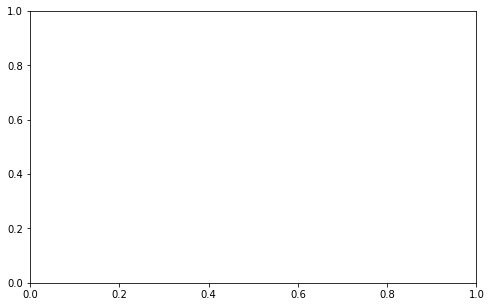

In [44]:
#define phi 
phi = np.linspace(0,1,100)

#create an empty numpy array for the correlation values
y_pi_corr_5 = np.empty(100) 
for i,X in enumerate(phi):
    y_pi_corr_5[i]=corr(X)

#plot
fig=plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(phi,y_pi_corr)
ax.grid() 
ax.set_xlabel('$\phi$')
ax.set_ylabel('$corr(y_t,\pi_t)$') 
ax.set_title('Correlation for different values of $\phi$'); 


Note: We understand that the graph is wrong (since there is no value of phi that would make the correlation=0.31), but we can't figure out whats wrong with the code. However, this is how we would have solved it:
        

In [611]:


from scipy import optimize
# We then make a function, which is the quadratic value of correlation function minus our desired value.
# We do this to create a function, that when minimized (which is when it is equal to 0) gives the desired value
obj = lambda phi: (corr(phi)-0.31)**2
# We then use scipy optimize to optimize the function
solution=optimize.minimize_scalar(obj,0, method='bounded',bounds=(0,1))
solution

     fun: 0.23577915091293652
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06

This imples that $\phi=0$ yields a correlation between $y_{t}$ and $\pi_{t}$ = 0.31.



In [627]:
# Optimize
x0=0
rootfinder=optimize.minimize(opt_correlation,x0)
rootfinder.x

array([0.])

# Other try: 

In [628]:
#set-up
np.random.seed(12345)   
T=50

#generate the stochastic shocks 
x1 = np.random.normal(0,par['sigma_x'],T)
c1 = np.random.normal(0,par['sigma_c'],T)

#Define a sumulation function

def sim(T, phi):
    pi_vec=[0]
    y_vec=[0]
    v_vec=[0]
    s_vec=[0]
    
    for t in range(1,T):
        
        #update v and s
        v_vec.append(v_func(v_vec[t-1], x1[t]))
        s_vec.append(s_func(s_vec[t-1], c1[t]))
        
        #update y and pi
        y_vec.append(yt_eq(par['alpha'], par['h'],par['b'],phi,par['gamma'],v_vec[t],s_vec[t],pi_vec[t-1], y_vec[t-1], s_vec[t-1]))
        pi_vec.append(pit_eq(par['alpha'], par['h'],par['b'],phi ,par['gamma'], v_vec[t], s_vec[t], pi_vec[t-1], y_vec[t-1], s_vec[t-1]))
        
        #convert lists to arrays
        #pi_vec = np.array(pi_vec)
        #y_vec = np.array(y_vec)
        
    
        y_pi_corr1=[]
        y_pi_corr1.append(np.corrcoef(y_vec, pi_vec)[1,0])
        
    return y_vec, pi_vec, y_pi_corr1
        
#y_vec, pi_vec, y_pi_corr1 = sim(T, phi)

In [629]:
y_pi=[]
phi_values=np.linspace(0,1,50)

for phi in phi_values:
    y_vec, pi_vec, y_pi_corr = sim(T,phi)
    y_pi.append(y_pi_corr)
 

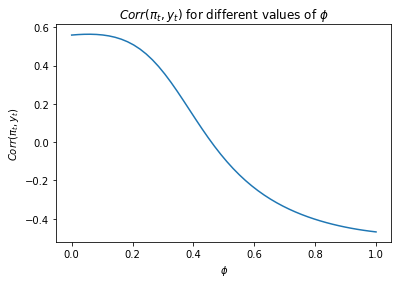

In [630]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(phi_values,y_pi)
ax.set_xlabel('$\phi$')
ax.set_ylabel('$Corr(\pi_t , y_t)$')
ax.set_title('$Corr(\pi_t , y_t)$ for different values of $\phi$');   


In [634]:
def optimal_corr(x):
    return(sim(T,phi)-0.31)**2

In [635]:
x0=0
rootfinder=optimize.minimize(optimal_corr,x0)
rootfinder.x

TypeError: unsupported operand type(s) for -: 'tuple' and 'float'

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

In [653]:
def sim(T, phi):
    pi_vec=[0]
    y_vec=[0]
    v_vec=[0]
    s_vec=[0]
    
    for t in range(1,T):
        
        #update v and s
        v_vec.append(v_func(v_vec[t-1], x1[t]))
        s_vec.append(s_func(s_vec[t-1], c1[t]))
        
        #update y and pi
        y_vec.append(yt_eq(par['alpha'], par['h'],par['b'],phi,par['gamma'],v_vec[t],s_vec[t],pi_vec[t-1], y_vec[t-1], s_vec[t-1]))
        pi_vec.append(pit_eq(par['alpha'], par['h'],par['b'],phi ,par['gamma'], v_vec[t], s_vec[t], pi_vec[t-1], y_vec[t-1], s_vec[t-1]))
        
        #convert lists to arrays
        pi_vec = np.array(pi_vec)
        y_vec = np.array(y_vec)
        
    
        y_pi_stats=[]
        y_pi_stats.append(y_vec.var())
        y_pi_stats.append(np.corrcoef(y_vec, pi_vec)[1,0])
        y_pi_stats.append(np.corrcoef(y_vec[1:], y_vec[:-1])[1,0])
        y_pi_stats.append(np.corrcoef(pi_vec[1:],pi_vec[:-1])[1,0])
        
        return y_vec, pi_vec, y_pi_stats
    
y_vec, pi_vec, y_pi_stats = sim(T, par['phi'])

In [ ]:
# initial guess is equal to the parameter values from question 5
x0 = np.array([phi_opt, sigma_x, sigma_c])

# defining parameter list used in our objective function below
parameters = [phi, sigma_x, sigma_c]

# setting parameter bounds
bnds = [[0,1],[0,50],[0,50]

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [7]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?